Домашняя работа по теме "Визуализация данных"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

**Обязательная часть**

Необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

*   Построить не менее 4 визуализаций различных видов;
*   каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
*   по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)

In [ ]:
apps = pd.read_csv('googleplaystore.csv')

In [ ]:
apps.info()
# в столбцах, содержащих числовые значения, потенциально подходящие для расчетов,
# нужно изменить тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Подготовка данных к визуализации

In [ ]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
apps[apps['Installs'] == 'Free']
#похоже, что значения в строке съехали на одну ячейку из-за отсутствия значения в Category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#удаляю строку с ошибкой
apps.drop(index=10472, inplace=True)

In [ ]:
#добавляю ту же строку, но с исправленными значениями
apps.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame',
                   np.NaN,
                   1.9,
                   '19',
                   '3.0M',
                   '1,000+',
                   'Free',
                   '0',
                   'Everyone',
                   np.NaN,
                   'February 11, 2018',
                   '1.0.19',
                   '4.0 and up'
                   ]

In [ ]:
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
apps['Installs'] = apps['Installs'].apply(lambda row: row.replace(',', '').strip('+'))
apps['Price'] = apps['Price'].apply(lambda row: row.strip('$'))

apps['Installs'] = apps['Installs'].astype('float').astype('Int64')
apps['Reviews'] = apps['Reviews'].astype('float').astype('Int64')
apps['Price'] = apps['Price'].astype('float')

In [ ]:
apps[apps['Type'].isna() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# т.к. Price = 0, пропуск в Type можно заменить
apps['Type'] = apps['Type'].fillna('Free')
apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
apps.info()
#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10472
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  Int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  Int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(2), float64(2), object(9)
memory usage: 1.2+ MB


Визуализация данных

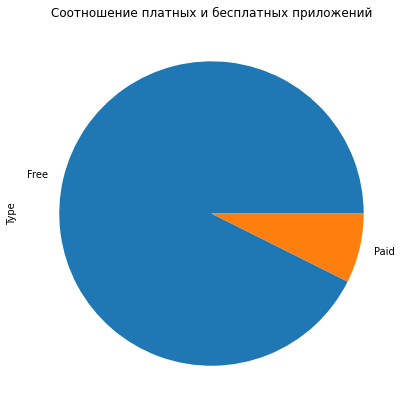

In [ ]:
type_apps = apps['Type'].value_counts()
type_apps.plot(kind='pie', title='Соотношение платных и бесплатных приложений')
# количество бесплатных приложений значительно превышает количество платных

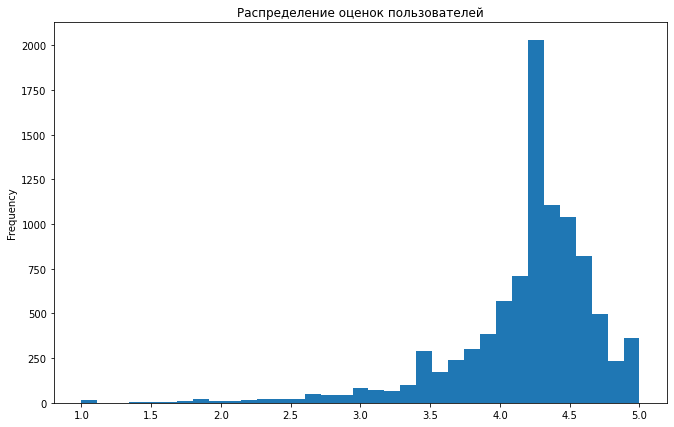

In [ ]:
apps['Rating'].plot(kind='hist', title='Распределение оценок пользователей', bins=35)
#большая часть оценок пользователей находится в диапазоне от 4 до 4.7,
# низкие оценки пользователи ставят редко

In [ ]:
# объем скачивания приложений по категориям
top_apps_by_install = apps[['Category', 'Installs']].groupby('Category').sum().sort_values('Installs', ascending=False).head(10)
top_apps_by_install['Installs'] = top_apps_by_install['Installs'] / 1000000

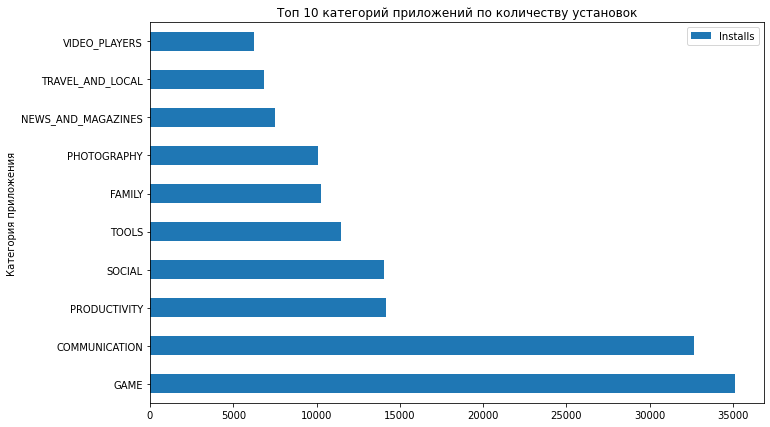

In [ ]:
top_apps_by_install.plot(kind='barh',
                         title='Топ 10 категорий приложений по количеству установок',
                         xlabel='Категория приложения',
                         ylabel='Количество установок, млн')
#наибольшей популярностью пользуются игры и приложения для коммуникации

In [ ]:
#можно сравнить показатели наиболее популярных категорий приложений
game = apps[apps['Category'] == 'GAME'].rename(columns={'Rating':'Rating by Game'})

communication = apps[apps['Category'] == 'COMMUNICATION'].rename(columns={'Rating':'Rating by Communication'})

Text(0.5, 0, 'Оценка приложений')

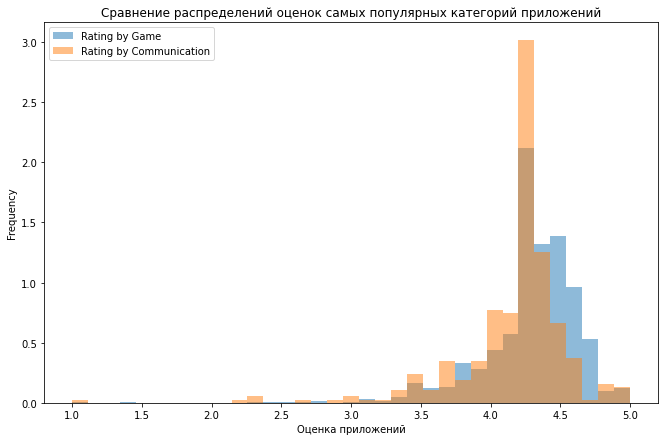

In [ ]:
game['Rating by Game'].plot(kind='hist', alpha = 0.5, bins=35, density = True)

communication['Rating by Communication'].plot(kind='hist', alpha = 0.5, bins=35, density = True)

plt.legend(loc='upper left')
plt.title('Сравнение распределений оценок самых популярных категорий приложений')
plt.xlabel('Оценка приложений')

# В категории "Game" распределение высоких оценок более равномерное.
# Но в обеих категориях чаще встречается оценка 4.2/4.3

In [ ]:
# объем скачиваний игр в зависимости от возрастного рейтинга
content_rating_by_games = game[['Content Rating', 'Installs']].groupby('Content Rating').sum().sort_values('Installs', ascending=False)
content_rating_by_games['Installs'] = content_rating_by_games['Installs'] / 1000000

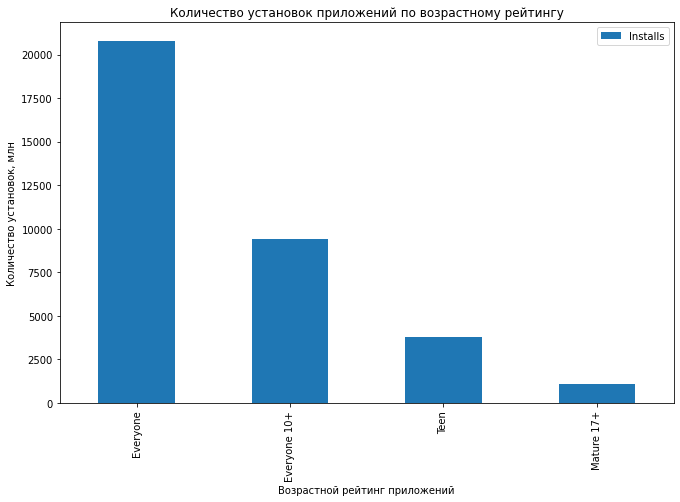

In [ ]:
content_rating_by_games.plot(kind='bar',
                             title='Количество установок приложений по возрастному рейтингу',
                             xlabel='Возрастной рейтинг приложений',
                             ylabel='Количество установок, млн'
                             )
# большая часть устанавливаемых игр - без ограничения по возрасту

In [ ]:
# выручка от платных игр
game['Revenue'] = game['Price'] * game['Installs'] / 1000

In [ ]:
revenue_by_game = (game[game['Type'] == 'Paid']
                   .groupby('Genres').sum()['Revenue']
                   )

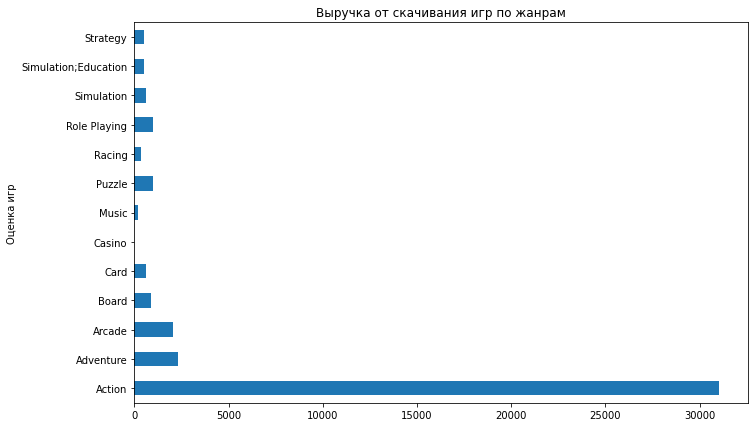

In [ ]:
revenue_by_game.plot(kind='barh',
                     title='Выручка от скачивания игр по жанрам',
                     ylabel='Размер выручки, тыс',
                     xlabel='Оценка игр',
                     stacked=True
                     )
# наиболее прибыльный жанр игр - экшн

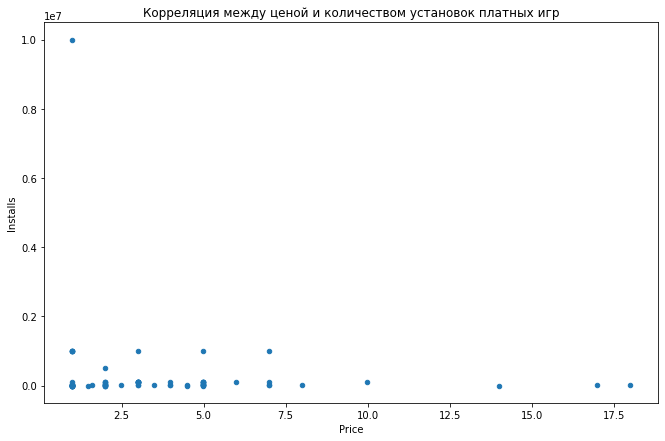

In [ ]:
game[game['Type'] == 'Paid'].plot(kind='scatter',
                                  x='Price',
                                  y='Installs',
                                  title='Корреляция между ценой и количеством установок платных игр'
                                  )
# платные игры устанавливают довольно редко, а если и устанавливают, то не дороже 8$
# есть аномально высокое значение количества устновок недорогой игры

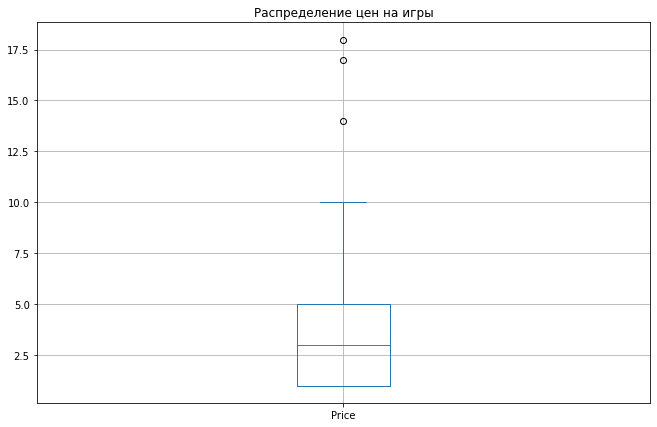

In [ ]:
game[game['Type'] == 'Paid']['Price'].plot(kind='box',
                                           title='Распределение цен на игры',
                                           grid=True
                                           )
# выбросов немного, стоимость большей части игр не превышает 10$,
# что объясняет корреляцию цены и количества установок

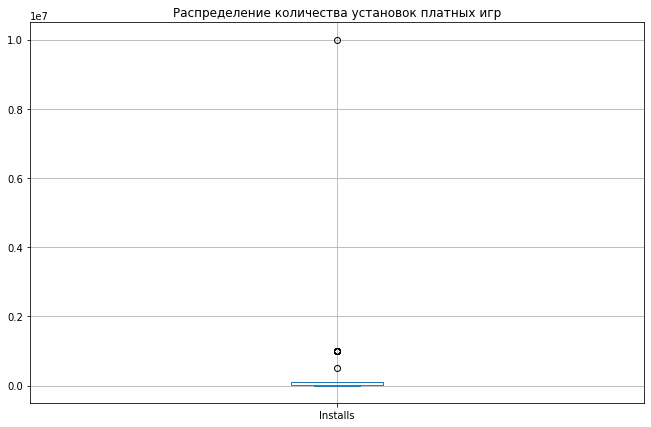

In [ ]:
game[game['Type'] == 'Paid']['Installs'].plot(kind='box',
                                              title='Распределение количества установок платных игр',
                                              grid=True
                                              )
# выбросов немного, но они существенно влияют на базовые статистики из-за большого размаха
# верхний выброс - скорее всего то же значение количества установок для недорогой игры, что и в корреляции с ценой

**Дополнительная часть (необязательная)**

1.   построить дополнительно не менее 2 визуализаций (итого не менее 6);
2.   в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix

In [ ]:
import seaborn as sns

In [ ]:
top_apps_by_install

,Installs
Category,
GAME,35086.024415
COMMUNICATION,32647.276251
PRODUCTIVITY,14176.091369
SOCIAL,14069.867902
TOOLS,11452.771915
FAMILY,10258.263505
PHOTOGRAPHY,10088.247655
NEWS_AND_MAGAZINES,7496.31776
TRAVEL_AND_LOCAL,6868.887146


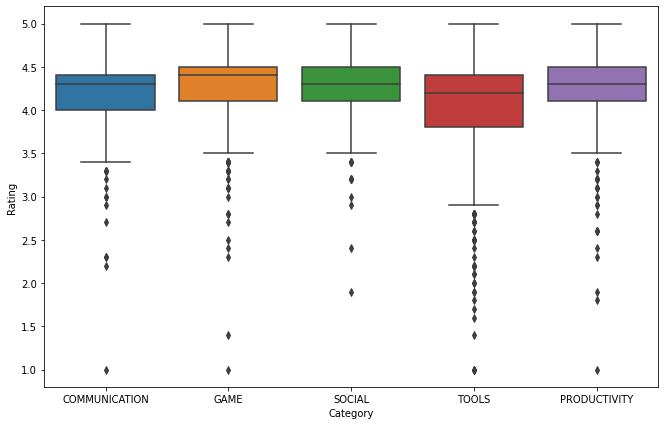

In [ ]:
top_apps = top_apps_by_install.head(5).index.values
sns.boxplot(x='Category', y='Rating',
            data=apps[apps['Category'].isin(top_apps)])
# Во всех категориях довольно много нижних выбросов,
# но в категории "SOCIAL" их меньше, чем в остальных
# В категории "TOOLS" межквартильный размах больше, чем в других категориях
# и в целом диапазон значений шире
# Медианная оценка во всех категориях примерно на одном уровне, в диапазоне от 4 до 4.5

In [ ]:
reviews_by_category_and_rating = (apps[(apps['Rating'] > 4.0) & (apps['Category'].isin(top_apps))]
                                  .pivot_table(index='Rating', columns='Category', values='Reviews', aggfunc=sum)
                                  .fillna(0)
                                  )

In [ ]:
reviews_by_category_and_rating

Category,COMMUNICATION,GAME,PRODUCTIVITY,SOCIAL,TOOLS
Rating,,,,,
4.1,32197922,28732727,1928787,159628839,2255602
4.2,61667254,39829353,4713484,24802948,10162799
4.3,181136117,142615333,25859724,46560537,6770064
4.4,254857530,417556292,27024044,23993546,53578648
4.5,89192760,514889659,18993785,270524168,73581117
4.6,11206374,384977863,32021465,14272406,49447504
4.7,573,44173799,2058516,942532,73939786
4.8,272274,2669570,5978,2562534,440840
4.9,0,58480,59,8894,242


In [ ]:
reviews_by_category_and_rating.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10 entries, 4.1 to 5.0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   COMMUNICATION  10 non-null     Int64
 1   GAME           10 non-null     Int64
 2   PRODUCTIVITY   10 non-null     Int64
 3   SOCIAL         10 non-null     Int64
 4   TOOLS          10 non-null     Int64
dtypes: Int64(5)
memory usage: 530.0 bytes


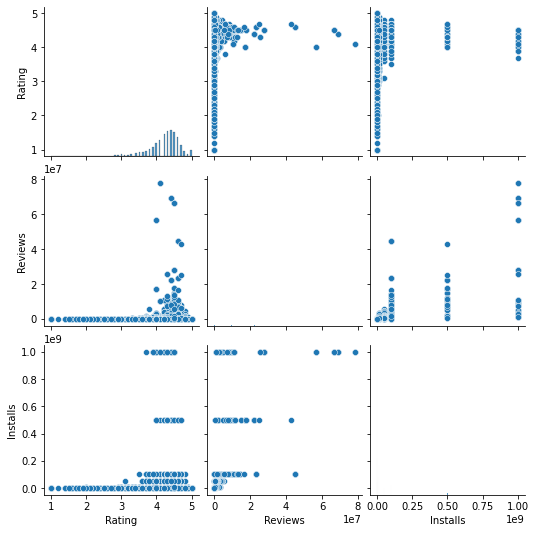

In [ ]:
sns.pairplot(apps[['Rating', 'Reviews', 'Installs']])
# наибольшее количество отзывов у приложений с высокой оценкой
# наиболшее количество скачиваний также у приложений с высокой оценкой
# достаточно много часто устанавливаемых приложений имеют мало отзывов

Домашняя работа выполнена.